In [ ]:
!pip install sidrapy
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [2]:
import sidrapy

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
ipca_raw = sidrapy.get_table(table_code = '1737',
                            territorial_level = '1',
                            ibge_territorial_code = 'all',
                            variable = '2265',
                            period = 'all',
                            header = 'n')

In [4]:
ipca_raw

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,1,Brasil,,,...,1,Brasil,197912,dezembro 1979,2265,IPCA - Variação acumulada em 12 meses
1,1,Brasil,,,...,1,Brasil,198001,janeiro 1980,2265,IPCA - Variação acumulada em 12 meses
2,1,Brasil,,,...,1,Brasil,198002,fevereiro 1980,2265,IPCA - Variação acumulada em 12 meses
3,1,Brasil,,,...,1,Brasil,198003,março 1980,2265,IPCA - Variação acumulada em 12 meses
4,1,Brasil,,,...,1,Brasil,198004,abril 1980,2265,IPCA - Variação acumulada em 12 meses
...,...,...,...,...,...,...,...,...,...,...,...
508,1,Brasil,2,%,12.13,1,Brasil,202204,abril 2022,2265,IPCA - Variação acumulada em 12 meses
509,1,Brasil,2,%,11.73,1,Brasil,202205,maio 2022,2265,IPCA - Variação acumulada em 12 meses
510,1,Brasil,2,%,11.89,1,Brasil,202206,junho 2022,2265,IPCA - Variação acumulada em 12 meses
511,1,Brasil,2,%,10.07,1,Brasil,202207,julho 2022,2265,IPCA - Variação acumulada em 12 meses


In [29]:
ipca = (
        ipca_raw
        .loc[0:, ['V', 'D2C']]
        .rename(columns = {'V': 'ipca',
                          'D2C': 'date'})

)

In [20]:
ipca

,ipca,date
0,...,197912
1,...,198001
2,...,198002
3,...,198003
4,...,198004
...,...,...
508,12.13,202204
509,11.73,202205
510,11.89,202206
511,10.07,202207


In [31]:
ipca = ipca.loc[ipca.date >= '2004-01-01']

In [33]:
ipca['date'] = pd.to_datetime(ipca['date'],
                             format = '%Y%m')

In [35]:
ipca['ipca'] = ipca['ipca'].astype(float)

In [37]:
ipca.describe()

,ipca
count,224.000000
mean,5.832232
std,2.194217
min,1.880000
25%,4.290000
50%,5.685000
75%,6.752500
max,12.130000


<AxesSubplot:xlabel='date', ylabel='ipca'>

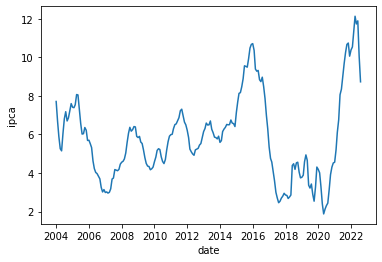

In [38]:
sns.lineplot(x = 'date',
            y = 'ipca',
            data = ipca)

<AxesSubplot:xlabel='ipca', ylabel='Count'>

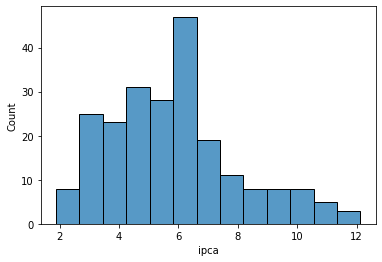

In [39]:
sns.histplot(x = 'ipca',
            data = ipca)

<AxesSubplot:ylabel='ipca'>

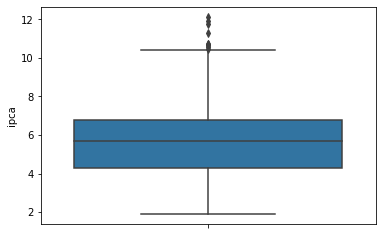

In [40]:
sns.boxplot(y = 'ipca',
            data = ipca)

In [41]:
# Taxa de desocupação - % - PNADC-M/IBGE
desocupacao_raw = sidrapy.get_table(table_code= "6381",
                                    territorial_level = "1",
                                    ibge_territorial_code = "all",
                                    variable = "4099",
                                    period = "all",
                                    header ='n')
# Realiza a limpeza e manipulação da tabela
desocupacao =  (
     desocupacao_raw
    .loc[0:,['V', 'D2C']]
    .rename(columns = {'V': 'desocupacao',
                       'D2C': 'date',}
            )
      )
# Transforma a coluna date em tipo datetime
desocupacao['date'] = pd.to_datetime(desocupacao['date'],
                                format = "%Y%m")

# Filtra os dados
desocupacao = desocupacao.loc[desocupacao.date > '2004-01-01']

# Transforma a coluna ipca em tipo float
desocupacao['desocupacao'] = desocupacao['desocupacao'].astype(float)

# Junta os dados
df_dados = pd.merge(ipca, desocupacao, on = 'date')

In [43]:
df_dados

,ipca,date,desocupacao
0,5.24,2012-03-01,8.0
1,5.10,2012-04-01,7.8
2,4.99,2012-05-01,7.7
3,4.92,2012-06-01,7.6
4,5.20,2012-07-01,7.5
...,...,...,...
120,11.30,2022-03-01,11.1
121,12.13,2022-04-01,10.5
122,11.73,2022-05-01,9.8
123,11.89,2022-06-01,9.3


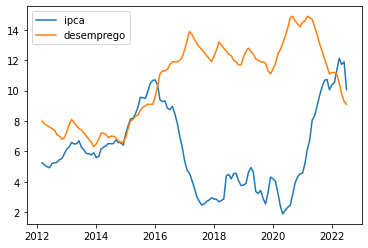

In [44]:
plt.plot('date',
         'ipca',
        data = df_dados,
        label = 'ipca')

plt.plot('date',
        'desocupacao',
        data = df_dados,
        label = 'desemprego')

plt.legend()

plt.show()

In [45]:
import statsmodels.formula.api as smf



In [48]:
modelo = smf.ols('ipca ~ desocupacao', data = df_dados).fit()

In [50]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ipca   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     12.61
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           0.000543
Time:                        16:10:03   Log-Likelihood:                -292.98
No. Observations:                 125   AIC:                             590.0
Df Residuals:                     123   BIC:                             595.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.3667      0.946      9.896      0.000       7.493      11.240
desocupacao    -0.3077      0.087     -3.552      0.001      -0.479      -0.136
==============================================================================
Omnibus:                       16.329   Durbin-Watson:                   0.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.140
Skew:                           0.776   Prob(JB):                     0.000516
Kurtosis:                       2.295   Cond. No.                         45.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='desocupacao', ylabel='ipca'>

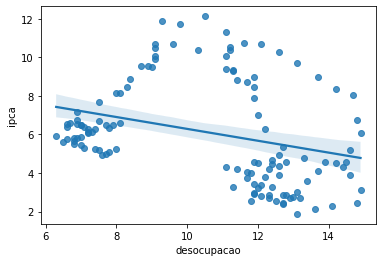

In [51]:
sns.regplot(x = 'desocupacao',
           y = 'ipca',
           data = df_dados)